In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
trainData = pd.read_csv("train.csv",low_memory = False)


In [3]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainData[["Sex","Survived"]].groupby("Sex").aggregate({"sum","count","mean"})

Survived           
            mean  sum count
Sex                        
female  0.742038  233   314
male    0.188908  109   577

In [5]:
trainData[["Fare","Survived"]].groupby("Fare").aggregate({"sum"})

,Survived
,sum
Fare,
0.0000,1
4.0125,0
5.0000,0
6.2375,0
6.4375,0
...,...
227.5250,3
247.5208,1


# Sobrevivientes por clase de boleto

In [6]:
trainData[["Pclass","Survived"]].groupby("Pclass").aggregate({"sum","mean","count"})

Survived           
            mean  sum count
Pclass                     
1       0.629630  136   216
2       0.472826   87   184
3       0.242363  119   491

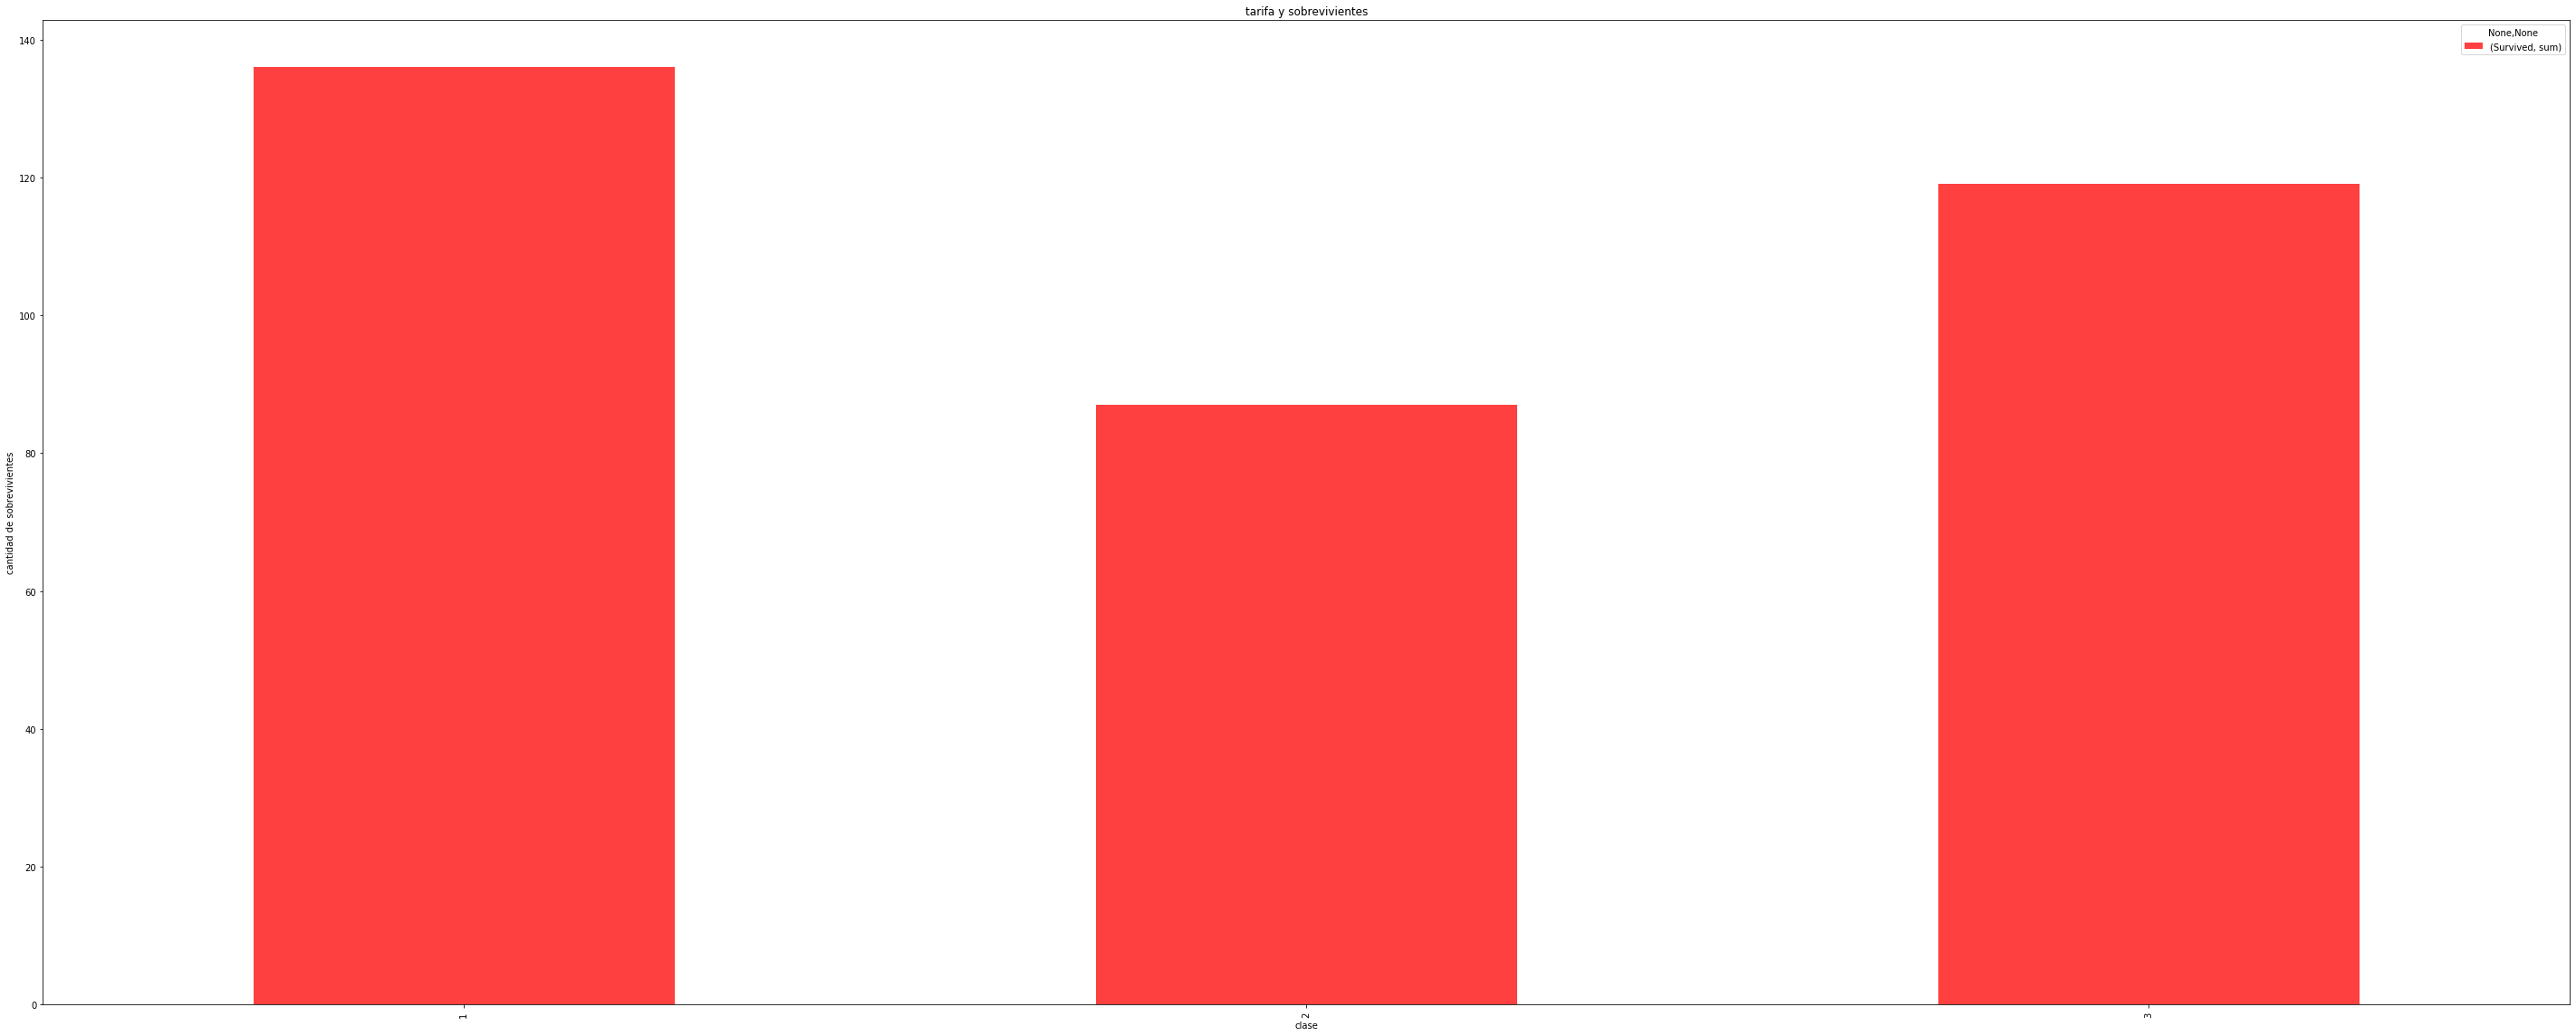

In [7]:

f = plt.figure()

plt.title ('tarifa y sobrevivientes',color='black')

ax = trainData[["Pclass","Survived"]].groupby("Pclass").aggregate({"sum"}).plot(kind='bar', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('clase')
ax.set_ylabel('cantidad de sobrevivientes')
plt.show()

# Sobrevivientes por tarifa

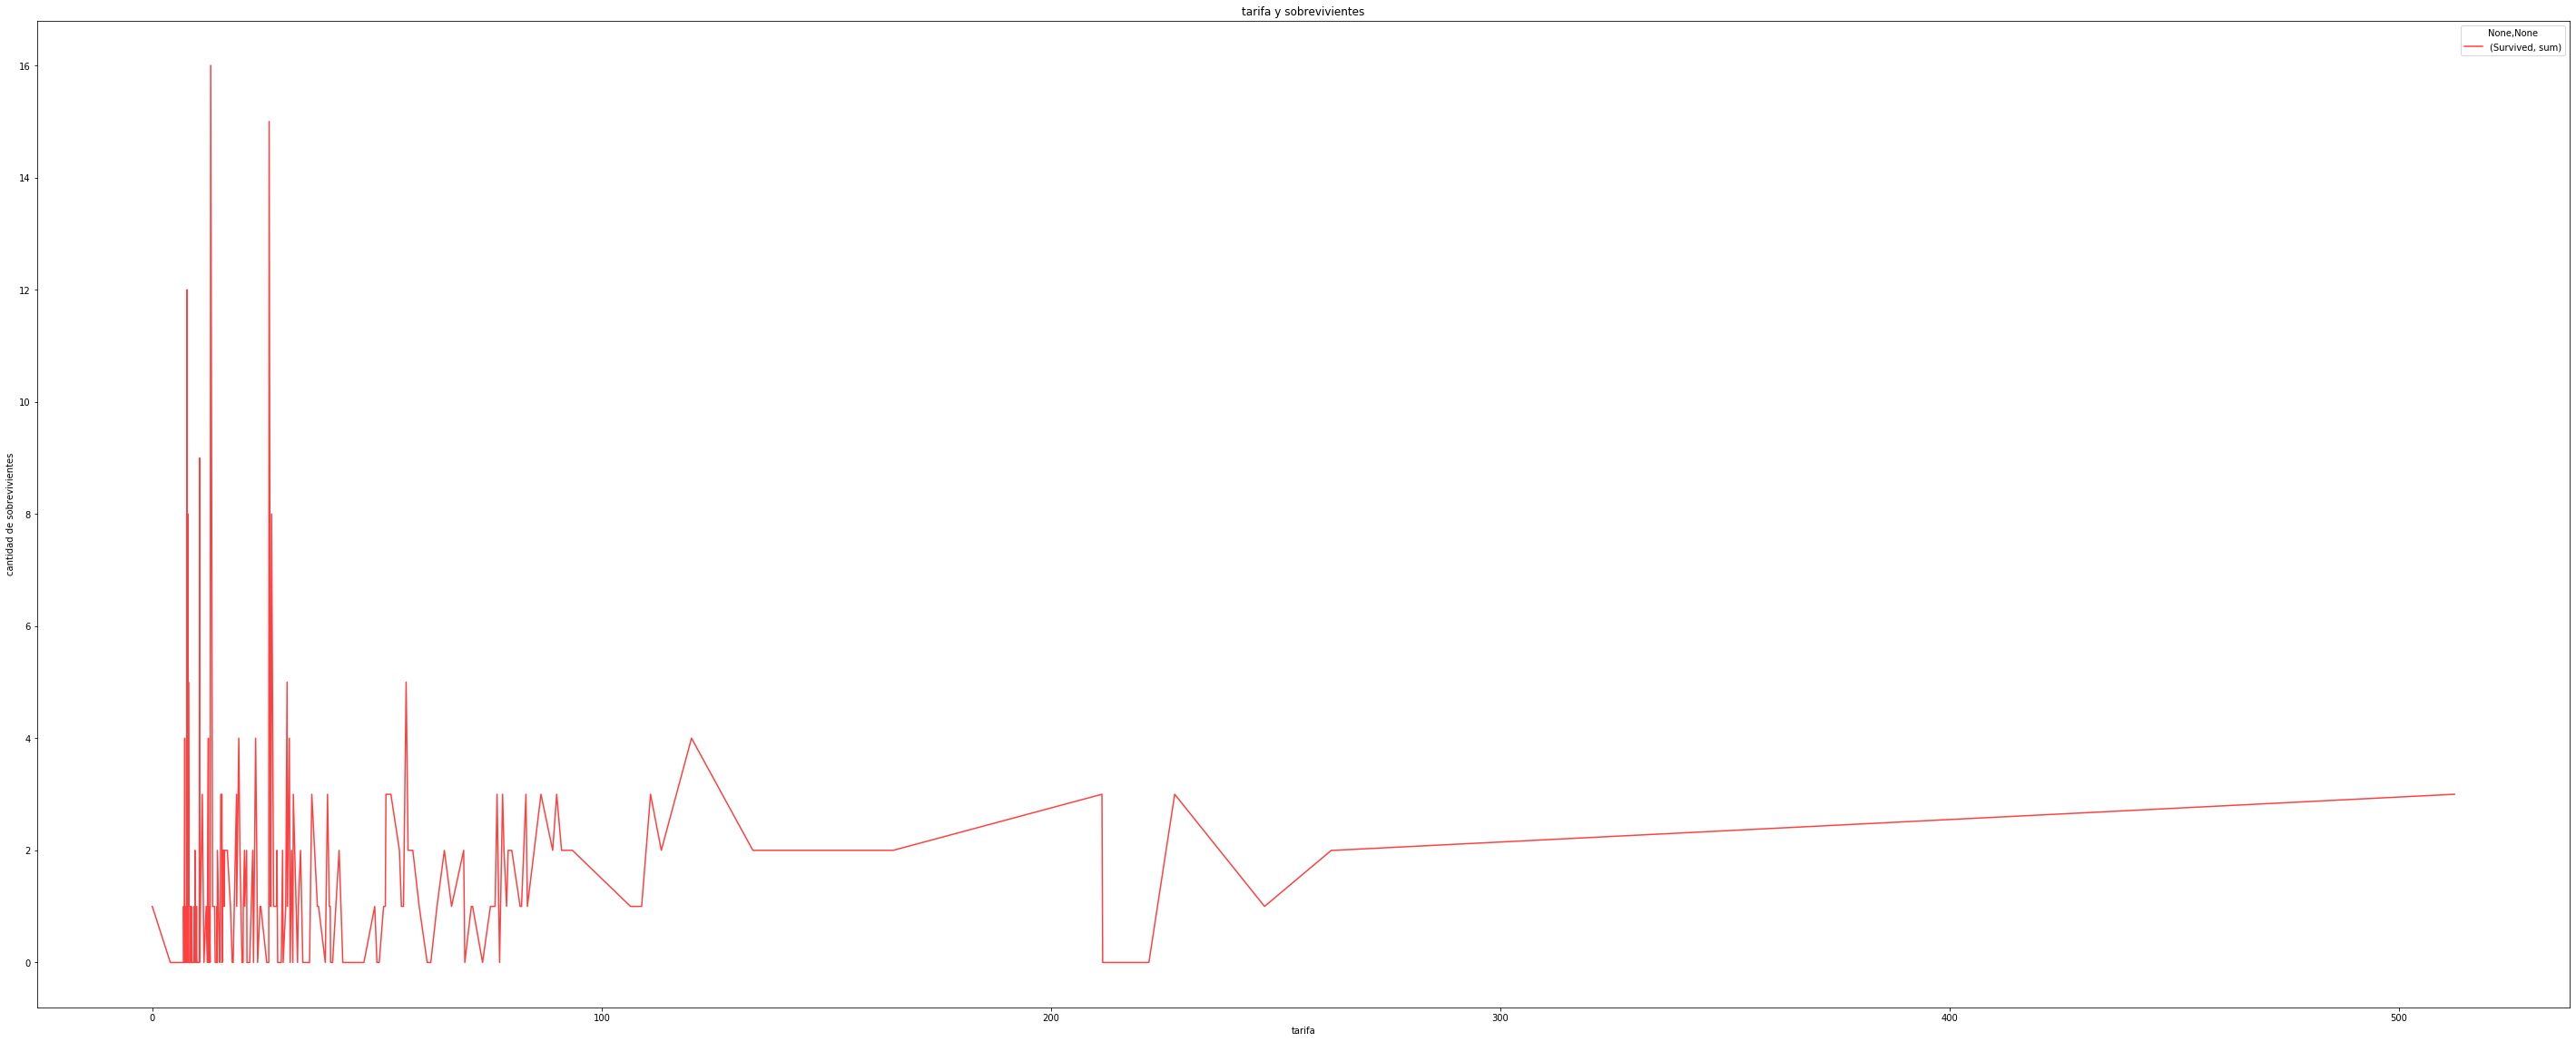

In [8]:

f = plt.figure()

plt.title ('tarifa y sobrevivientes',color='black')

ax = trainData[["Fare","Survived"]].groupby("Fare").aggregate({"sum"}).plot(kind='line', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('tarifa')
ax.set_ylabel('cantidad de sobrevivientes')
plt.show()

In [9]:
mean_fare = trainData["Fare"].mean()
std_fare = trainData["Fare"].std()
trainData["fare_norm"] = (trainData["Fare"] - mean_fare)/std_fare

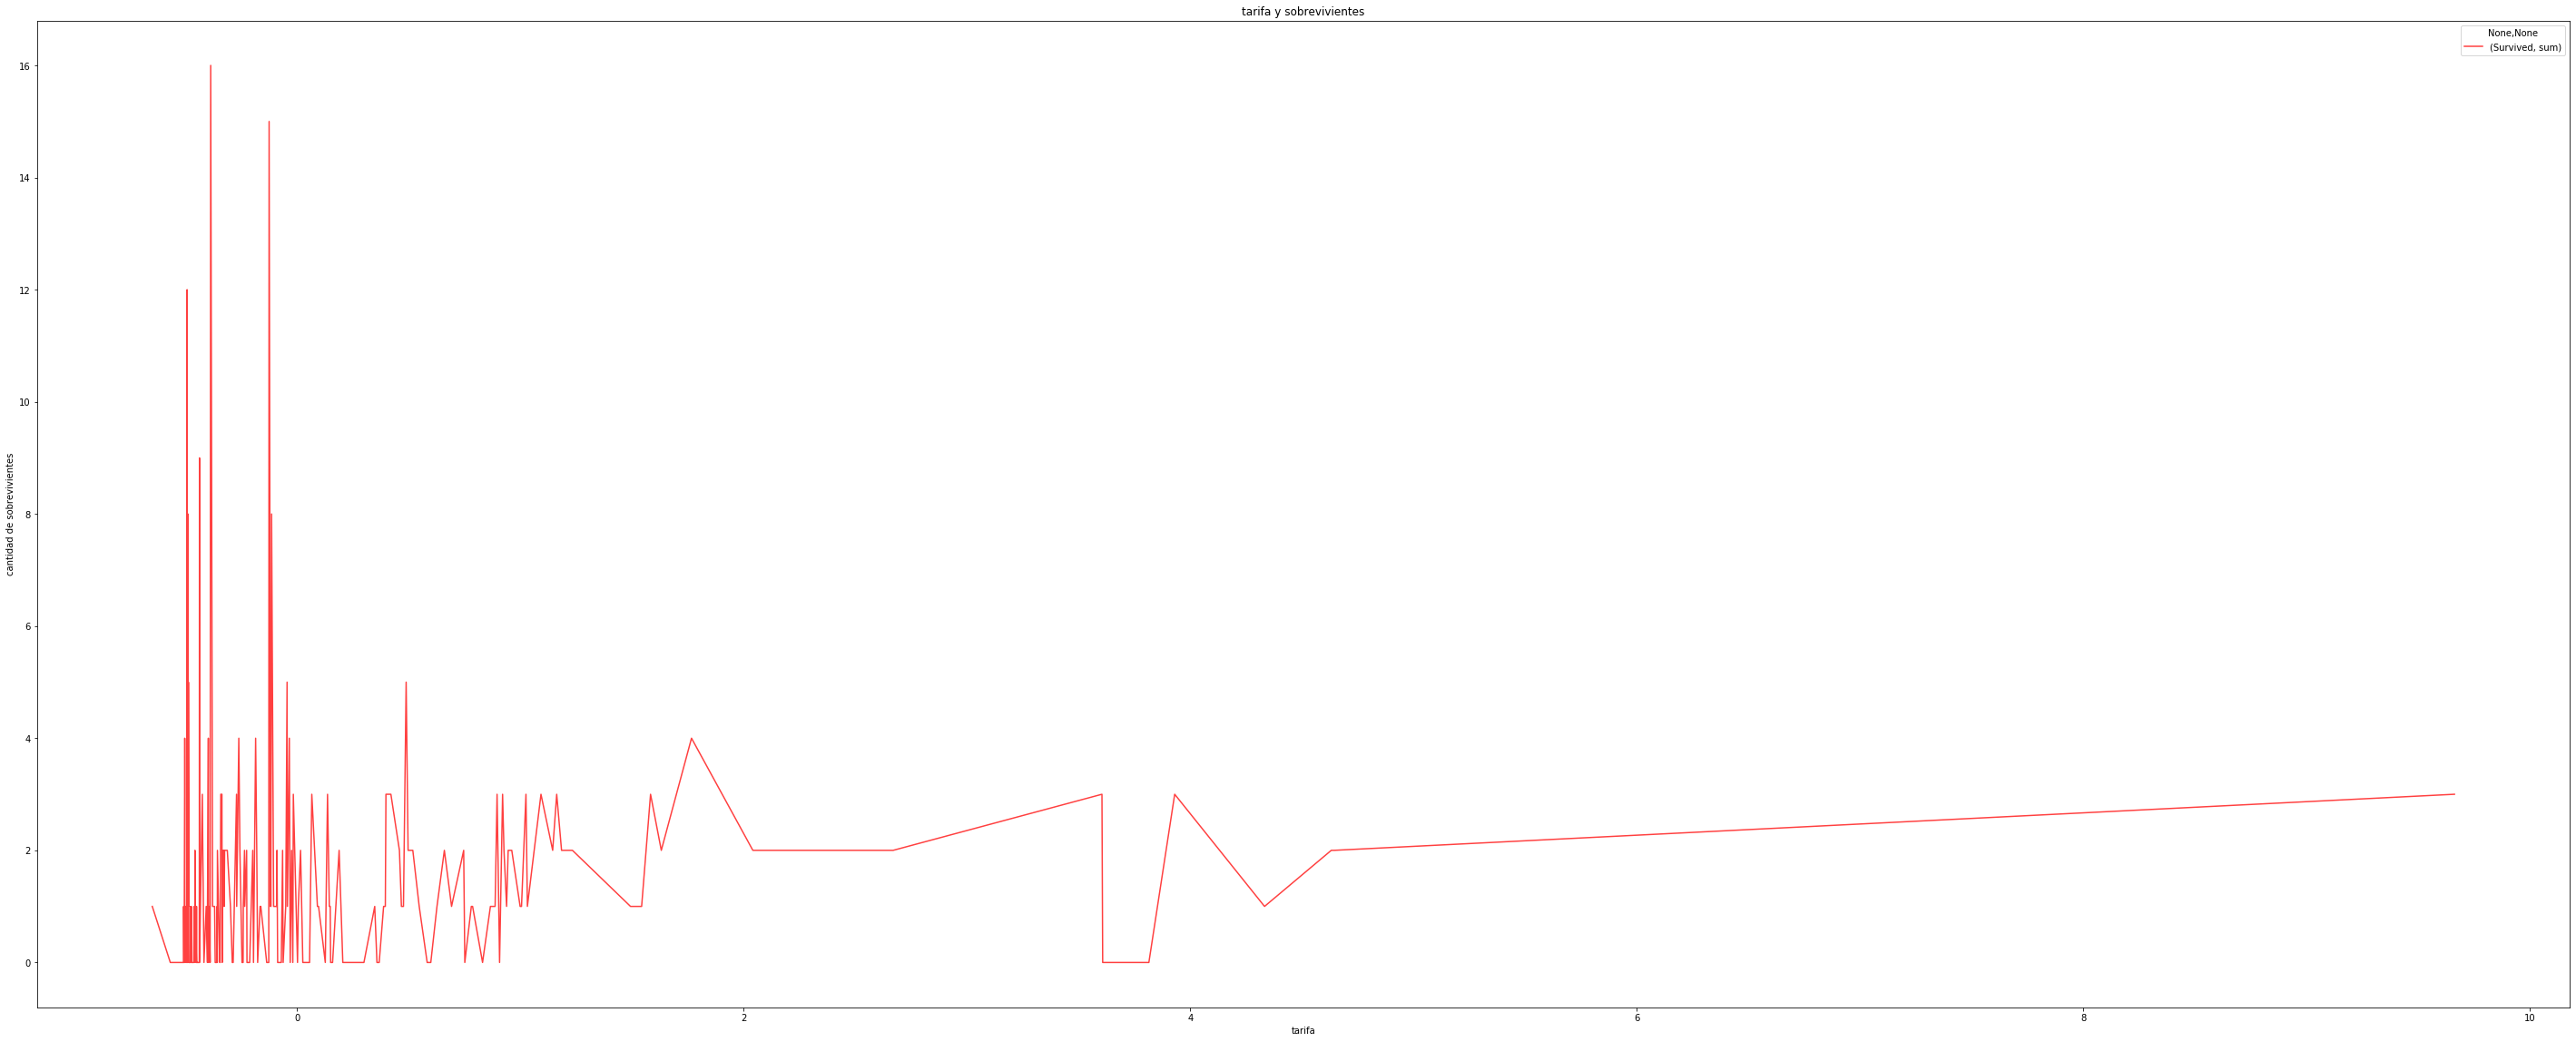

In [10]:

f = plt.figure()

plt.title ('tarifa y sobrevivientes',color='black')

ax = trainData[["fare_norm","Survived"]].groupby("fare_norm").aggregate({"sum"}).plot(kind='line', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('tarifa')
ax.set_ylabel('cantidad de sobrevivientes')
plt.show()

# Sobrevivientes por edad

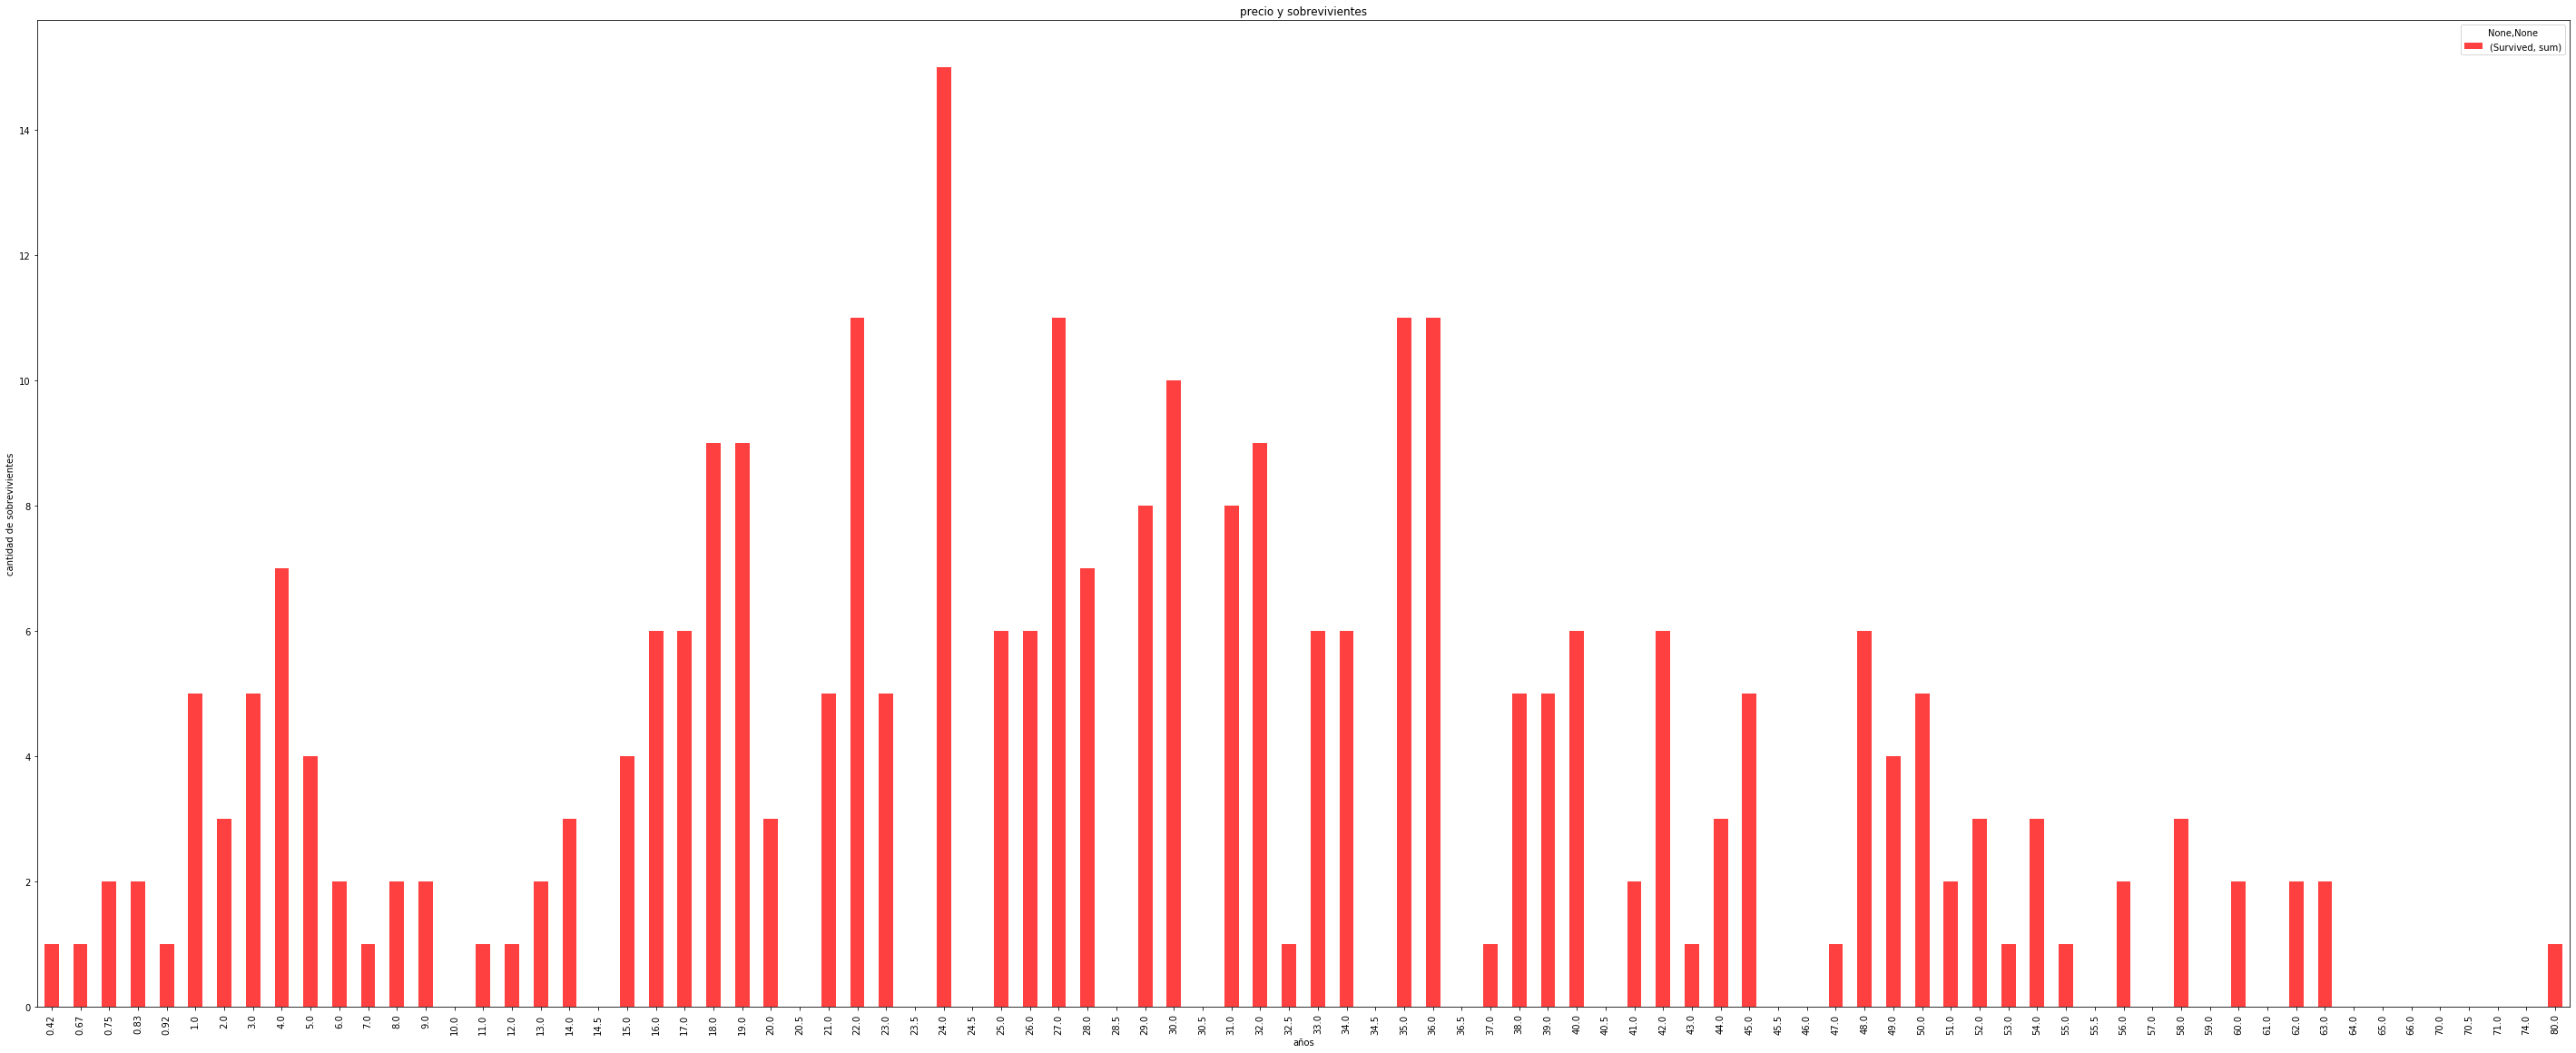

In [11]:

f = plt.figure()

plt.title ('precio y sobrevivientes',color='black')

ax = trainData[["Age","Survived"]].groupby("Age").aggregate({"sum"}).plot(kind='bar', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('años')
ax.set_ylabel('cantidad de sobrevivientes')
plt.show()

In [12]:
mean_age = trainData["Age"].mean()
std_age = trainData["Age"].std()
trainData["age_norm"] = (trainData["Age"] - mean_age)/std_age

In [13]:
trainData["age_norm"]

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age_norm, Length: 891, dtype: float64

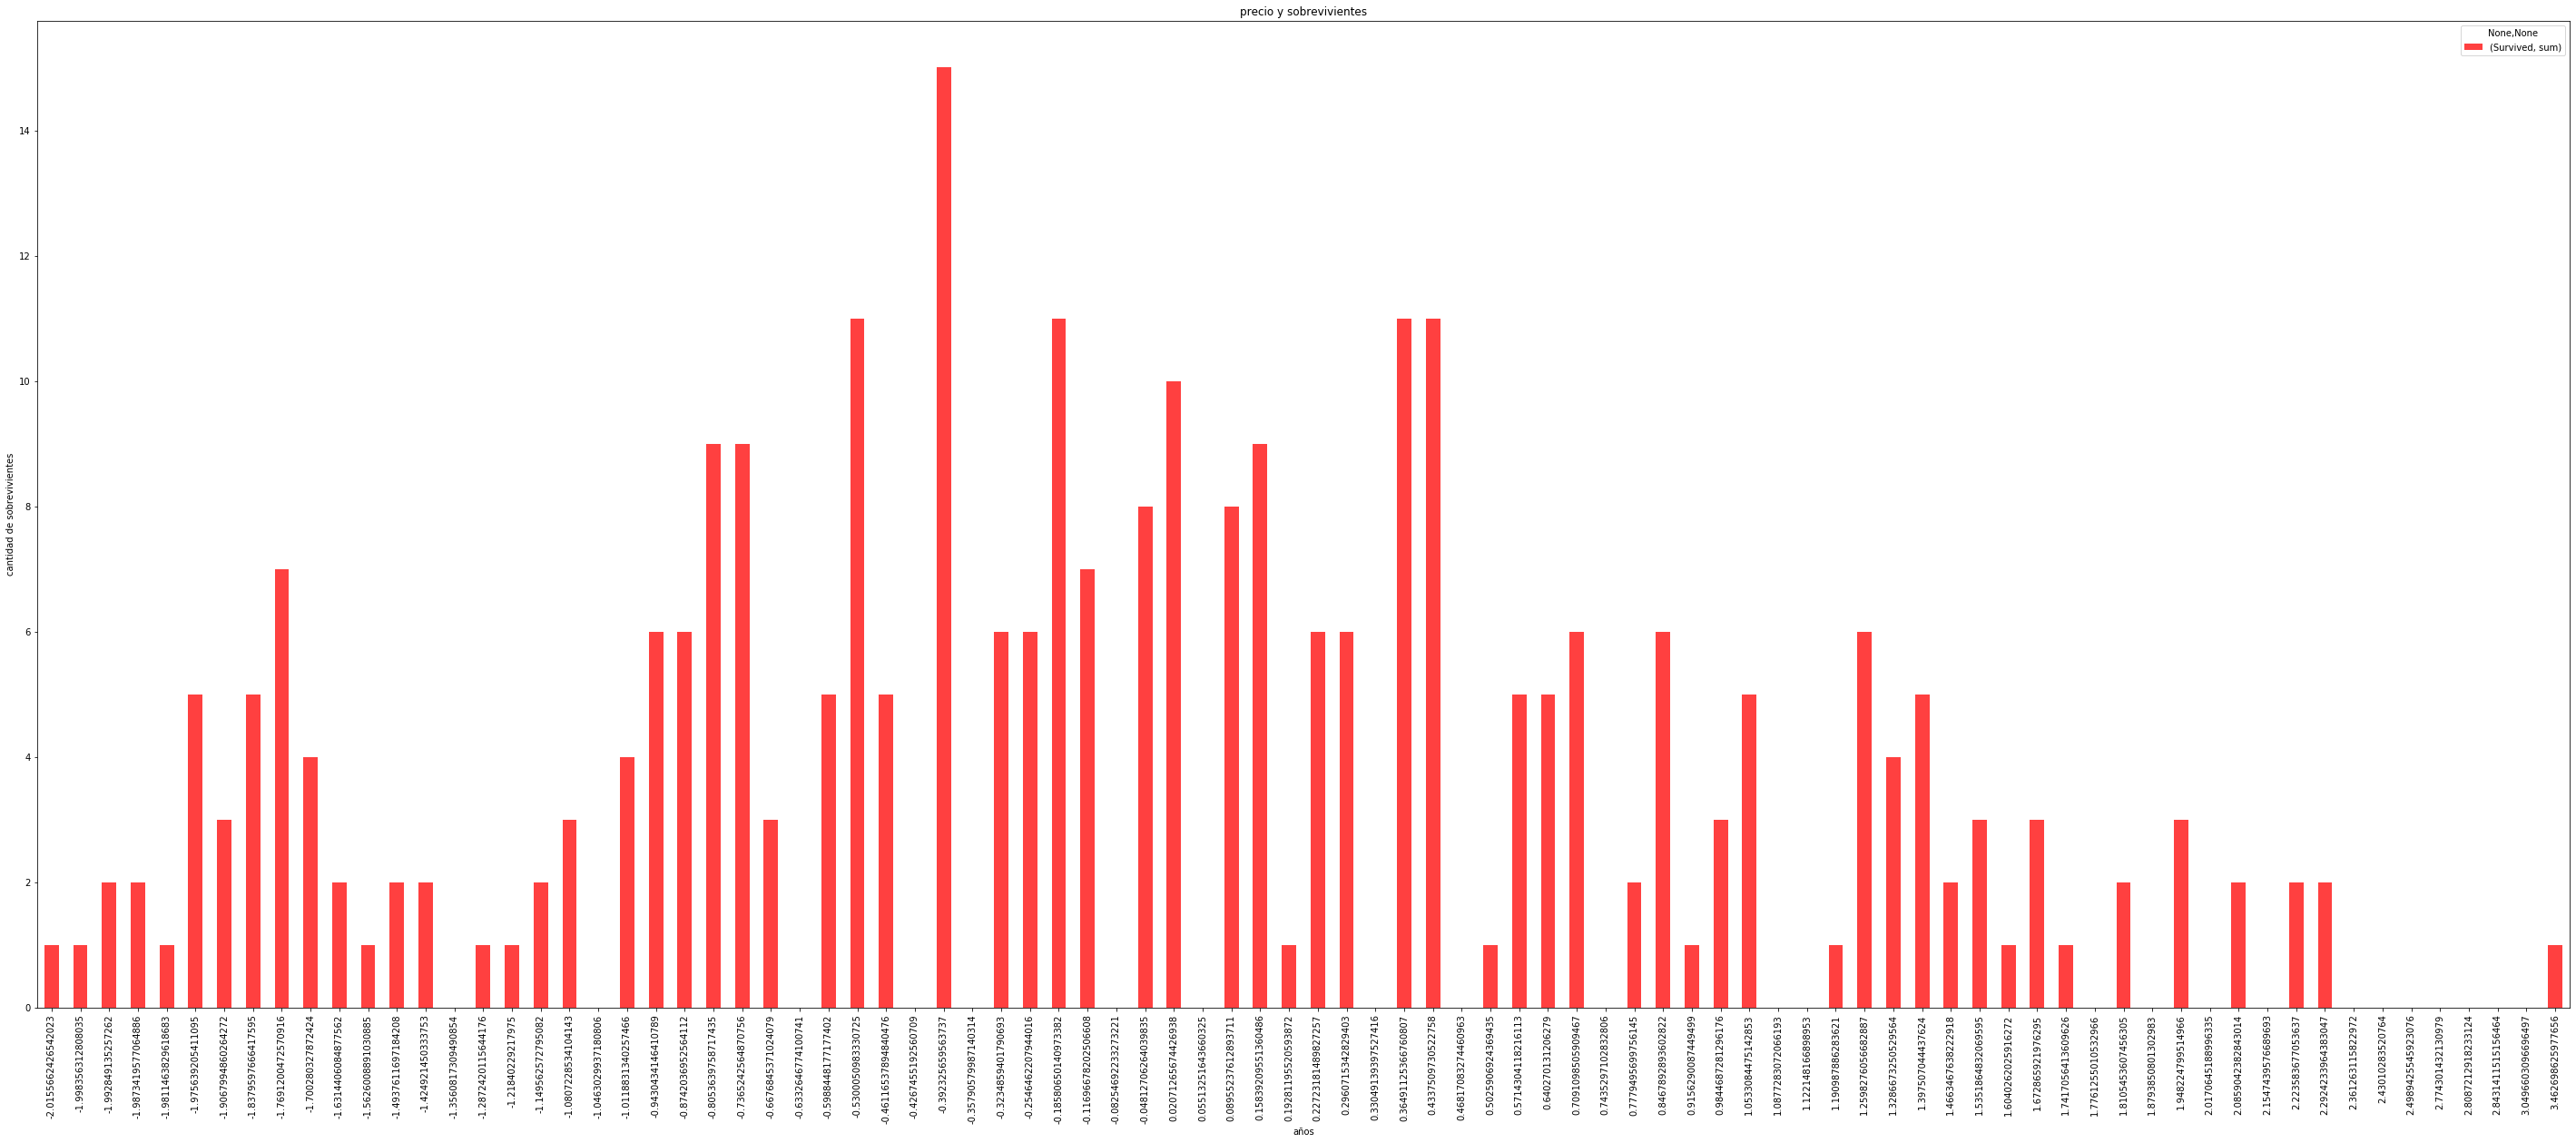

In [14]:

f = plt.figure()

plt.title ('precio y sobrevivientes',color='black')

ax = trainData[["age_norm","Survived"]].groupby("age_norm").aggregate({"sum"}).plot(kind='bar', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('años')
ax.set_ylabel('cantidad de sobrevivientes')
plt.show()

# Cantidad de pasajeros y sobrevivientes

In [15]:
trainData["Survived"].count()

891

In [16]:
trainData["Survived"].sum()

342

In [17]:
trainData["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F2             3
              ..
A19            1
D11            1
B4             1
A10            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [18]:
trainData["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
trainData[["Embarked","Survived"]].groupby("Embarked").aggregate({"sum","mean","count"})

Survived           
              mean  sum count
Embarked                     
C         0.553571   93   168
Q         0.389610   30    77
S         0.336957  217   644

# Ninos salvados 

In [20]:
trainData[trainData["Age"] < 6]["Survived"].value_counts()

1    31
0    13
Name: Survived, dtype: int64

# Tipo de tickets

In [21]:
trainData["Ticket"].head(272)

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
267              347083
268            PC 17582
269            PC 17760
270              113798
271                LINE
Name: Ticket, Length: 272, dtype: object

In [23]:
trainData[(trainData["Ticket"].map(lambda x: x.split(" ")[1] if(len(x.split(" ")) > 1) else x)).astype(str).str.isdigit() == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_norm,age_norm
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S,-0.488580,-0.598845
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S,-0.488580,-0.598845
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,-0.648058,0.433751
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S,-0.504679,-0.530005
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,-0.648058,-0.323486
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,-0.648058,-0.736524
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,-0.488580,0.158392
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S,-0.488580,0.640270
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S,-0.488580,0.984469
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S,-0.504679,-0.874204


In [24]:
def mapTicket(x):
    if(len(x.split(" ")) == 2):
        return x.split(" ")[1]
    elif(len(x.split(" ")) == 3):
        return x.split(" ")[2]
    elif(str(x).isdigit()):
        return x
    elif x == "LINE":
        return "500"


In [150]:
trainData["Ticket"] = trainData[(trainData["Ticket"].map(lambda x: mapTicket(x))).astype(str).str.isdigit() == True]["Ticket"].map(lambda x: mapTicket(x))


In [151]:
(trainData["Ticket"].astype(str).str.isdigit() == True)

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Ticket, Length: 891, dtype: bool

In [158]:
trainData[ trainData["Ticket"].astype(str).str.isdigit() == True]["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [159]:
ticket_survived = trainData[ trainData["Ticket"].astype(str).str.isdigit() == True][["Survived","Ticket"]]

In [160]:
ticket_survived["Ticket"]

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: object

In [161]:
ticket_survived["Ticket"] = ticket_survived["Ticket"].astype(int)

In [162]:
ticket_survived["Ticket"]

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: int64

In [163]:
ticket_survived.sort_values("Ticket",ascending = True)

,Survived,Ticket
772,0,3
841,0,3
597,0,500
271,1,500
179,0,500
...,...,...
363,0,3101310
210,0,3101311
784,0,3101312
511,0,3101316


ValueError: scatter requires an x and y column

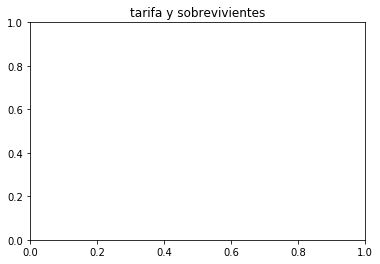

In [169]:

f = plt.figure()

plt.title ('tarifa y sobrevivientes',color='black')

ax = ticket_survived[ticket_survived["Ticket"]<500000].groupby("Ticket").sum().sort_values("Ticket",ascending = True).plot(kind='scatter', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )
ticket_survived[ticket_survived["Ticket"]<500000].groupby("Ticket").count().sort_values("Ticket",ascending = True).plot(kind='line', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='blue' )

ax.set_xlabel('tarifa')
ax.set_ylabel('cantidad de sobrevivientes')
plt.show()

In [35]:
trainData["Cabin"].isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [36]:
trainData[trainData["Cabin"].isna()]["Survived"].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [94]:
trainData[trainData["Cabin"].isna() == False]["Survived"].value_counts() #los que tiene cabina la mayoria se salva

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Parch

In [39]:
trainData[["Parch","Survived"]].groupby("Parch").aggregate({"sum","count","mean"})

Survived               
         count  sum      mean
Parch                        
0          678  233  0.343658
1          118   65  0.550847
2           80   40  0.500000
3            5    3  0.600000
4            4    0  0.000000
5            5    1  0.200000
6            1    0  0.000000

# SibSP

In [43]:
trainData[["SibSp","Survived"]].groupby("SibSp").aggregate({"sum","count","mean"})


Survived               
         count  sum      mean
SibSp                        
0          608  210  0.345395
1          209  112  0.535885
2           28   13  0.464286
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000

In [50]:
trainData["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles